# Исследование продаж игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности, это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Цель исследования:**
Спланировать рекламную компанию 2017г на основе имеющихся данных до 2016г.


**Ход исследования:**

Данные из открытых источников хранятся в файле `games.csv`.
Выгружу данные и проведу исследование в следующем порядке:

1. Обзор данных;
2. Предобработка данных;
3. Исследовательский анализ данных;
4. Составьте портрет пользователя каждого региона;
5. Проверьте гипотезы;
6. Общий вывод.
___

## Обзор дынных

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
# Откроем файл с данными
try:
    df = pd.read_csv('games.csv')
except:
    df= pd.read_csv('/datasets/games.csv')

In [3]:
# Посмотрим на 5 первых строк
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Посмотрим на 5 последних строк
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
# Посмотрим на 5 рандомных строк
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6543,"SpongeBob SquarePants: Lights, Camera, Pants!",XB,2005.0,Misc,0.19,0.06,0.00,0.01,NaN,NaN,NaN
1788,Super R.C. Pro-Am,GB,1991.0,Racing,0.58,0.37,0.15,0.04,NaN,NaN,NaN
14111,Fushigi no Dungeon: Fuurai no Shiren 5 - Fortu...,DS,2010.0,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
10002,SplashDown,XB,2002.0,Racing,0.09,0.02,0.00,0.00,78.0,tbd,E
1099,Street Fighter II': Special Champion Edition,GEN,1992.0,Fighting,1.00,0.30,0.31,0.04,NaN,NaN,NaN


In [6]:
# Посмотрим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов: 

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Вывод**

При первичном просмотре данных были обнаружены недочеты. Для их исправления предпримем следующее:

- привести названия столбцов к нижнему регистру,
- заменить тип данных в некоторых столбцах
- посмотреть количество пропущенных значений и по возможности заполнить.
___

## Предобработка данных

Начнём с названий столбцов, приведем их к нижнему регистру.

In [7]:
df.columns = df.columns.str.lower()

Посмотрим на процент пропущенных значений по столбцам.

In [8]:
pd.DataFrame(round(df.isna().mean()*100)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Пропусков в `critic_score` 51%, а в `user_score` и `rating` по 40% - значительная часть данных.
Если смотреть по выборке выше, почти в равной степени встречаются пропуски в этих трёх столбцах. Просмотрев данные подробнее не выявила какие-либо закономерности в пропусках, склоняюсь, что  их причина в некорректной выгрузке. 
Т.к. данные из этих столбцов понадобятся для проведения исследования и проверке гипотез, замена на то же медианное значение может исказить финальный результат, поэтому оставим пропуски как есть. 

Только подкорректируем общий вид данных. Посмотрим уникальные значения в этих столбцах.

In [9]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [12]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Рассмотрим описание значков рейтинга ниже: 

- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет;
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет;
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет;
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
- «EC» («Early childhood») — «Для детей младшего возраста»;
- «RP» («Rating Pending») — «Рейтинг ожидается»;
- «K-A» ("Kids to Adults") после изменили на «E» («Everyone») — «Для всех»;
- «AO» («Adults Only 18+») — «Только для взрослых».

Заменю редко встречающихся обозначения рейтинга на более популярные.
- рейтинг «K-A» и 'EC' заменим на «E»;
- рейтинг «AO» заменю на «M».
- предположим, что пропуски в данных не определены и заменим их на 'no_ESRB'

In [13]:
df['rating'] = df['rating'].replace(['K-A','EC'], 'E')
df['rating'] = df['rating'].replace('AO', 'M')
#df['rating'] = df['rating'].fillna('RP')
df['rating'] = df['rating'].fillna('no_ESRB')

In [14]:
df['rating'].value_counts()

no_ESRB    6766
E          4001
T          2961
M          1564
E10+       1420
RP            3
Name: rating, dtype: int64

In [15]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

В столбце `genre` 2 пропущенных значения, ровно как и в столбце `name`.

Проверим совпадают ли пропуски в одной строке.

In [16]:
df.query('genre.isna() == True and name.isna() == True')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,no_ESRB
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,no_ESRB


Поскольку строки не несут никакой информации и их всего 2, удалим из датастета.

In [17]:
df = df.dropna(subset = ['genre'])

В столбце `user_score`, помимо оценок есть текстовое значение 'tbd', поэтому тип данных изменился на object.

Т.к. значение 'tbd' ('To Be Determined' - будет определено) на момент исследования определить никак не можем, заменим его на nan, что бы перевести тип столбца в целочисленный.

In [18]:
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype('float64')
#df.loc[df.user_score=='tbd', 'user_score'] = np.nan

Поскольку пропусков в столбце `year_of_release` всего 2%, удалим данные строки. Заодно заменим тип данных

In [19]:
df = df.dropna(subset = ['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype(int)

In [20]:
print('Неявных дубликатов в таблице:', df.duplicated(subset=['name', 'platform']).sum())
df[df.duplicated(subset=['name', 'platform'])==True]

Неявных дубликатов в таблице: 3


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


Количество неявных дубликатов незначительно. Игра NFS выходила на разных платформах, в разные года, поэтому оставлю данные как есть.

In [21]:
# Проверим таблицу на дубликаты
df.duplicated().sum()

0

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [22]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [23]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_ESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_ESRB,31.38


In [24]:
# Повторно проверим пропуски и тип данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


**Вывод** 

- Заменили названия столбцов (привели к нижнему регистру);
- Преобразовали данные в нужные типы;
- Обработали пропуски;
- Добавили отдельный столбец с суммарными продажами во всех регионах.
___

In [25]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ данных
### Сколько игр выпускалось в разные годы?

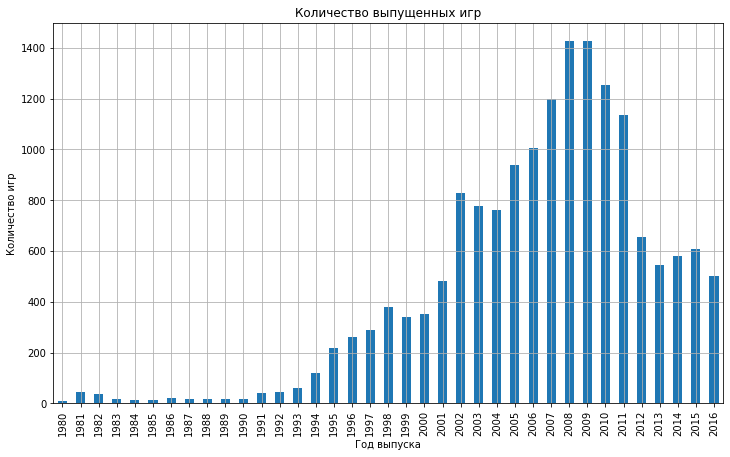

In [26]:
(df.pivot_table(index='year_of_release', values='platform', aggfunc='count')
   .plot(kind='bar',legend=False,grid=True, figsize = (12,7)))

plt.title('Количество выпущенных игр')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

**Вывод**

Как видно на графике до 1994 года игр выпускалось значительно меньше. Ранее игры были нишевым увлечением и только постепенно со временем, развитием технологий, а впоследствии их доступности увеличился спрос и соответственно производство игр для разных платформ.

Пик производства пришёлся на 2008-2009год, выпущено более 2800 игр. Предположу, что спад с 2010 года, был связан как и с финансовым кризисом, так и с развитием рынка мобильных игр.
____

### Как менялись продажи по платформам?

Рассмотрим топ платформ по объему продаж и построим график с самыми популярными.

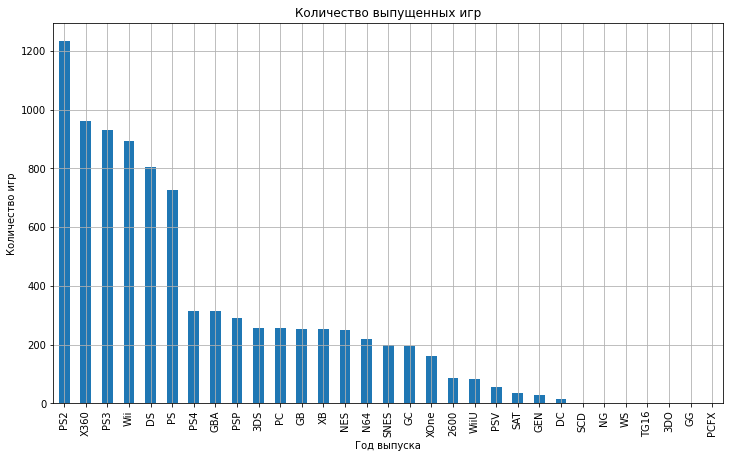

In [27]:
df.pivot_table(index='platform', values='total_sales', aggfunc={'sum'}).sort_values(by='sum', ascending=False).head(15)

(df.pivot_table(index='platform', values='total_sales', aggfunc={'sum'}).sort_values(by='sum', ascending=False)
    .plot(kind='bar',legend=False,grid=True, figsize = (12,7)))

plt.title('Количество выпущенных игр')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

Лидеры продаж следующие платформы: PS2, XB360, PS3, Wii, DS, PS. 

Построим график распределения продаж по годам.

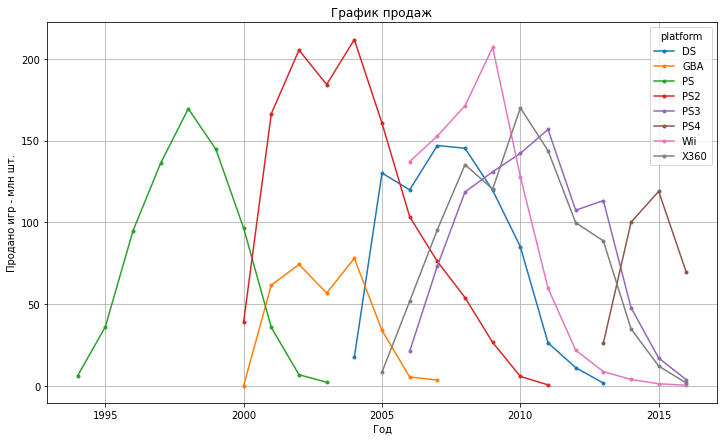

In [28]:
(df.query('year_of_release > 1990 and platform == ["PS2","X360","PS3","Wii","DS","PS", "GBA", "PS4"]')
   .pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
   .plot(legend=True, label='count', grid=True, figsize=(12,7), style='.-'))

plt.title('График продаж')
plt.xlabel('Год')
plt.ylabel('Продано игр - млн шт.')
plt.show()


Для более полной информации построим график с 2010 года. Т.к. на графике выше мы видим, что некоторые консоли актуальны по 10 лет, соответственно они заработали больше с продаж, чем недавно вышедшие. Посмотрим какие консоли популярны на данный момент.

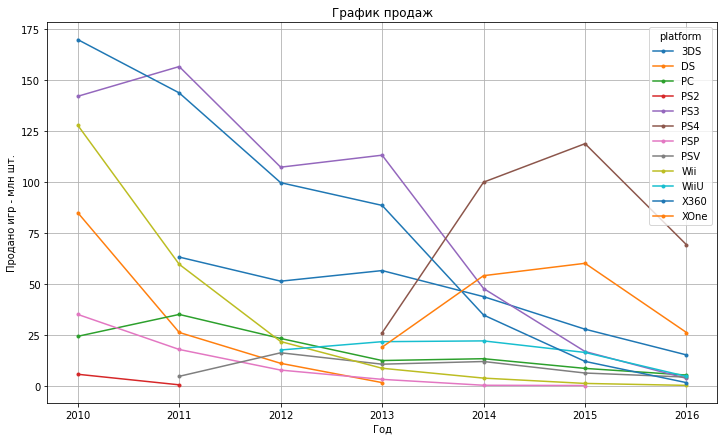

In [29]:
(df.query('year_of_release >= 2010')
   .pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
   .plot(legend=True, label='count',grid = True, figsize = (12,7), style='.-'))

plt.title('График продаж')
plt.xlabel('Год')
plt.ylabel('Продано игр - млн шт.')
plt.show()

    Рассмотрим график и выявим как долго консоли оставались актуальны на рынке:
- `PlayStation 2` и `Xbox 360` - 11 лет
- `PlayStation 3` и `Nintendo Wii` - 10 лет
- `Nintendo DS` и `PlayStation` - 9 лет

**Вывод**

Таким образом популярные консоли актуальны на рынке  в среднем на протяжении 10 лет. Пик продаж приходится на 2-4 год после релиза.
    
Для анализа выберем период с 2013 года, т.к. данный диапазон захватывает пик продаж новых консолей, так же и "старые" остаются на рынке.
___

### Анализ данных за актуальный период.

In [30]:
# Создадим таблицу с данными с 2013 года
df_new = df.query('year_of_release >= 2013')

In [31]:
(df_new.pivot_table(index='platform', values='total_sales', aggfunc={'sum'})
       .sort_values(by='sum', ascending=False))

,sum
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


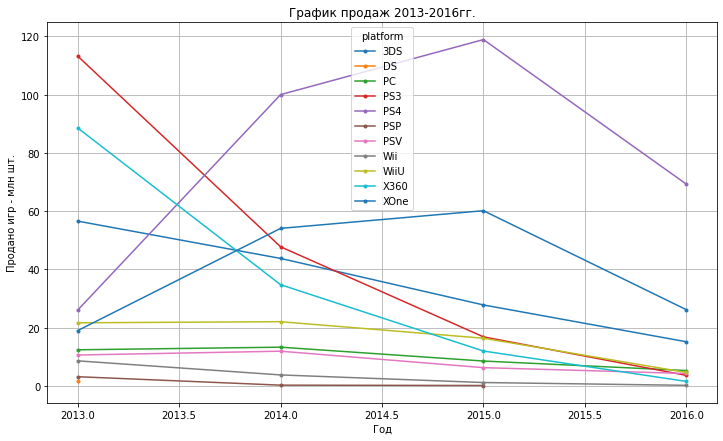

In [32]:
(df_new.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
       .plot(legend=True, label='count',grid = True, figsize = (12,7), style='.-'))
plt.title('График продаж 2013-2016гг.')
plt.xlabel('Год')
plt.ylabel('Продано игр - млн шт.')
plt.show()

В период с 2013 по 2016 год лидер по продажам PlayStation 4 - 288 млн. копий игр, это в два раза больше, чем и XboxOne 140 млн. копий - это лучшие показатели за данный период. По продажам остальных платформ можно предположить, что они в ближайшее время уйдут с рынка.

В сравнении с первым графиком, лидирующие по продажам платформы изменились. 

Спад продаж в 2016 году связан с неполными данными(по условию).

**Вывод**

В заданный период лидирует по продажам:
- `PlayStation 4` - 314 млн. копий игр продано;
- `PlayStation 3` - 181 млн. копий игр продано;
- `XboxOne` - 159 млн. копий игр продано;
- `3DS` - 143 млн. копий игр продано;
- `Xbox360` - 136 млн. копий игр продано;

Потенциально подходящими платформами для производства игр в 2017 году являются `PlayStation 4` и `XboxOne`.
___

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

Рассмотрим статистику по всем платформам в период с 2013 по 2016г.

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


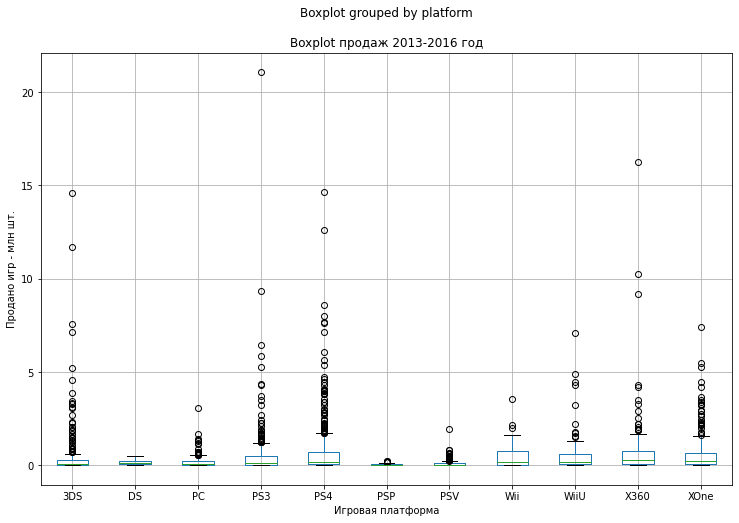

In [33]:
display(df_new.groupby('platform')['total_sales'].describe())

df_new.boxplot(column='total_sales', by='platform', figsize = (12,8))
plt.title('Boxplot продаж 2013-2016 год')
plt.xlabel('Игровая платформа')
plt.ylabel('Продано игр - млн шт.')
plt.show()

Изменим параметры графика для наглядности

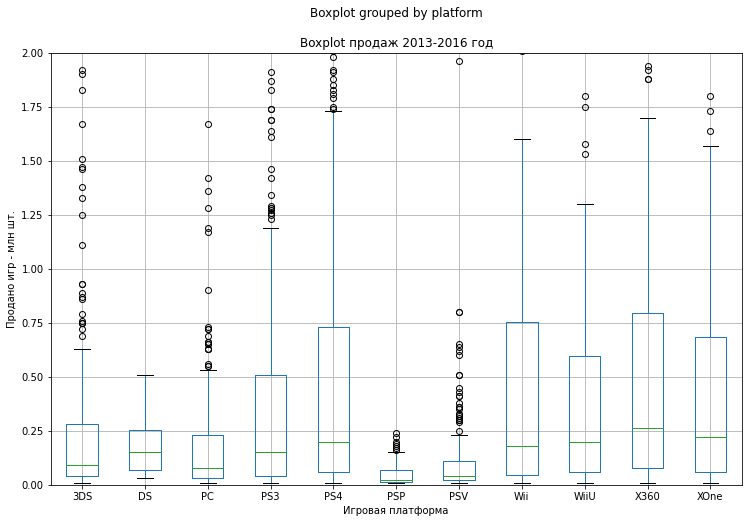

In [34]:
df_new.boxplot(column='total_sales', by='platform', figsize = (12,8))
plt.title('Boxplot продаж 2013-2016 год')
plt.xlabel('Игровая платформа')
plt.ylabel('Продано игр - млн шт.')
plt.ylim(0, 2)
plt.show()

Так же посмотрим статистику по топ платформам в период с 2013 по 2016г.

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.04,0.090,0.280,14.60
PS3,345.0,0.525884,1.451939,0.01,0.04,0.150,0.510,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.200,0.730,14.63
X360,186.0,0.735484,1.663275,0.01,0.08,0.265,0.795,16.27
XOne,247.0,0.645020,1.036139,0.01,0.06,0.220,0.685,7.39


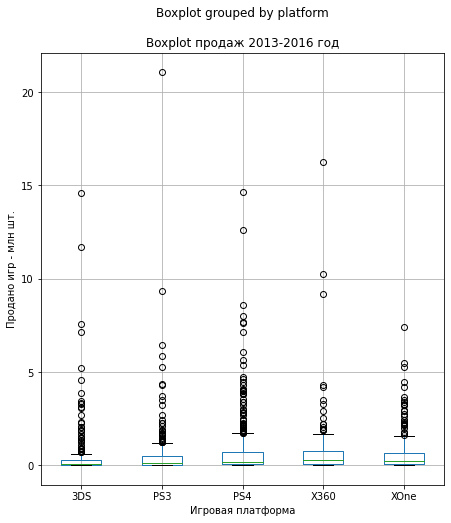

In [35]:
display(df_new.query('platform == ["PS4", "PS3", "XOne","3DS","X360"]')
              .groupby('platform')['total_sales'].describe())

(df_new.query('platform == ["PS4", "PS3", "XOne","3DS","X360"]')
       .boxplot(column='total_sales', by='platform', figsize = (7,8)))
plt.title('Boxplot продаж 2013-2016 год')
plt.xlabel('Игровая платформа')
plt.ylabel('Продано игр - млн шт.')
plt.show()

Для большей наглядности построим второй график.

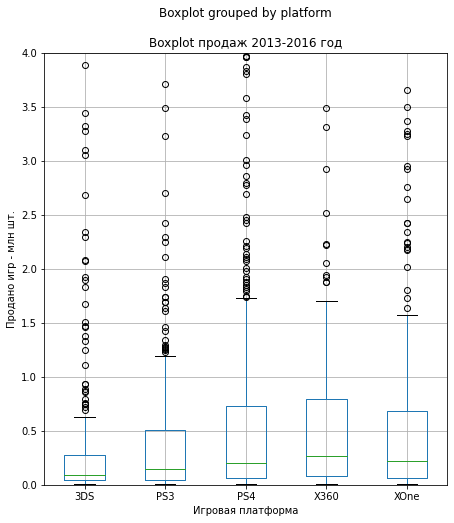

In [36]:
(df_new.query('platform == ["PS4", "PS3", "XOne","3DS","X360"]')
       .boxplot(column='total_sales', by='platform', figsize = (7,8)))
plt.title('Boxplot продаж 2013-2016 год')
plt.xlabel('Игровая платформа')
plt.ylabel('Продано игр - млн шт.')
plt.ylim(0, 4)
plt.show()

**Вывод**
 
На графике, а так же по таблице мы видим, что средний показатель совокупных продаж в несколько раз превышает медианный. Возможно такой разрыв связан с играми "эксклюзивами", которые продаются более успешно и соответственно большим тиражом.


Медианные продажи на разных платформах варьируются  100-265 тыс.
___

### Влияние отзывов пользоватей и критиков на продажи игр для PlayStation 4

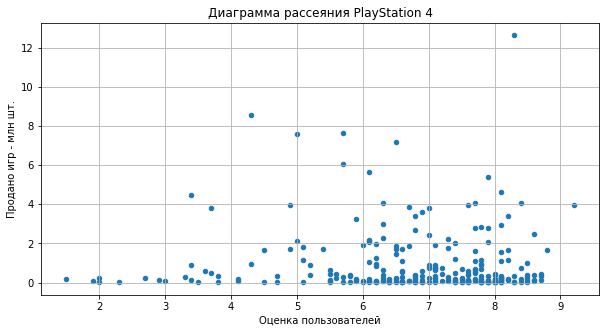

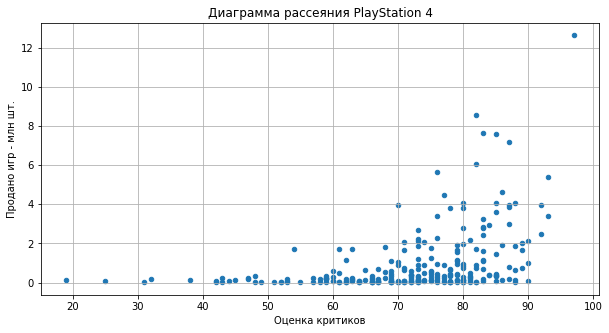

Коэффициент корреляции оценок пользователей к продажам платформы PlayStation 4: -0.031957110204556424
Коэффициент корреляции оценок критиков к продажам платформы PlayStation 4: 0.406567902061781


In [37]:
(df_new.query('platform == ["PS4"]')
       .plot(x='user_score', y='total_sales', kind='scatter',grid = True, figsize = (10,5)))
plt.title('Диаграмма рассеяния PlayStation 4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продано игр - млн шт.')
ps4=df_new.query('platform == ["PS4"]')
plt.show()

(df_new.query('platform == ["PS4"]')
       .plot(x='critic_score', y='total_sales', kind='scatter',grid = True, figsize = (10,5)))
plt.title('Диаграмма рассеяния PlayStation 4')
plt.xlabel('Оценка критиков')
plt.ylabel('Продано игр - млн шт.')
plt.show()

print('Коэффициент корреляции оценок пользователей к продажам платформы PlayStation 4:', ps4['total_sales'].corr(ps4['user_score']))
print('Коэффициент корреляции оценок критиков к продажам платформы PlayStation 4:', ps4['total_sales'].corr(ps4['critic_score']))

**Вывод**

Коэффициент корреляции оценок критиков к продажам - небольшой, но по графику видно, что связь между ними всё-таки есть. 

Чем выше оценка критика, тем больше было продано копий, а вот от оценок пользователей продажи не зависят.
___

### Влияние отзывов пользоватей и критиков на продажи игр для других платформ.

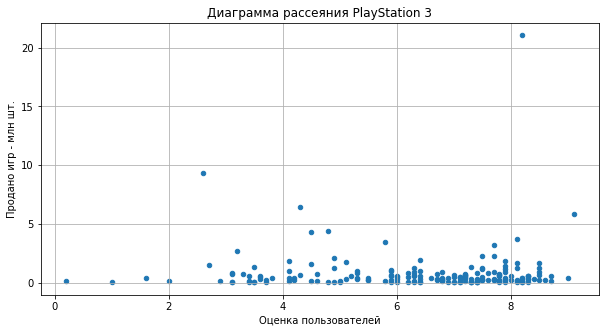

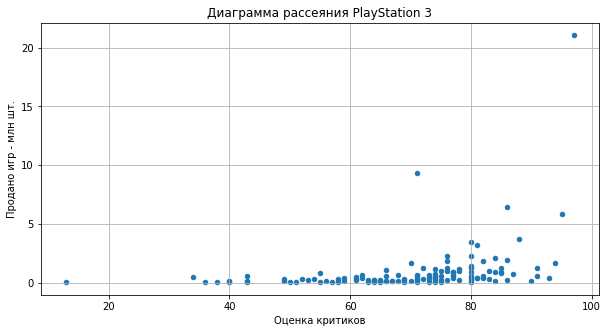

Коэффициент корреляции оценок пользователей к продажам платформы PlayStation 3: 0.0023944027357566925
Коэффициент корреляции оценок критиков к продажам платформы PlayStation 3: 0.3342853393371919


In [38]:
(df_new.query('platform == ["PS3"]')
       .plot(x='user_score', y='total_sales', kind='scatter',grid = True, figsize = (10,5)))
plt.title('Диаграмма рассеяния PlayStation 3')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продано игр - млн шт.')
ps3=df_new.query('platform == ["PS3"]')
plt.show()

(df_new.query('platform == ["PS3"]')
       .plot(x='critic_score', y='total_sales', kind='scatter',grid = True, figsize = (10,5)))
plt.title('Диаграмма рассеяния PlayStation 3')
plt.xlabel('Оценка критиков')
plt.ylabel('Продано игр - млн шт.')
plt.show()

print('Коэффициент корреляции оценок пользователей к продажам платформы PlayStation 3:', ps3['total_sales'].corr(ps3['user_score']))
print('Коэффициент корреляции оценок критиков к продажам платформы PlayStation 3:', ps3['total_sales'].corr(ps3['critic_score']))

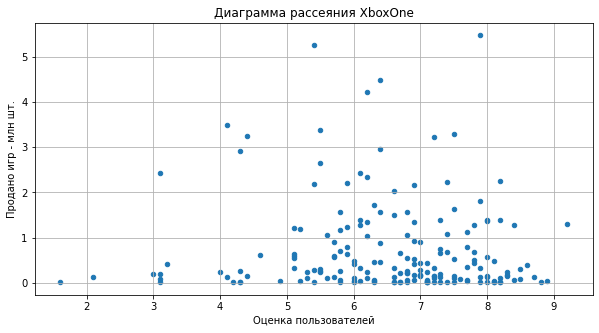

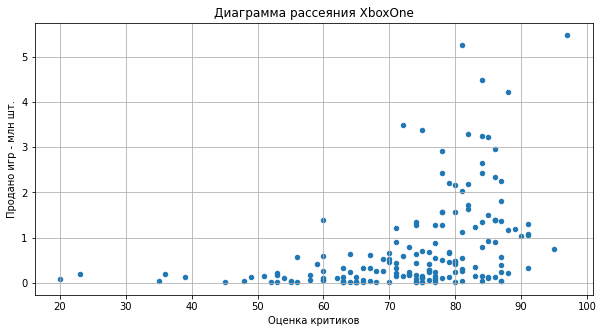

Коэффициент корреляции оценок пользователей к продажам платформы XboxOne: -0.06892505328279412
Коэффициент корреляции оценок критиков к продажам платформы XboxOne 0.41699832800840175


In [39]:
(df_new.query('platform == ["XOne"]')
       .plot(x='user_score', y='total_sales', kind='scatter',grid = True, figsize = (10,5)))
plt.title('Диаграмма рассеяния XboxOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продано игр - млн шт.')
xone=df_new.query('platform == ["XOne"]')
plt.show()

(df_new.query('platform == ["XOne"]')
       .plot(x='critic_score', y='total_sales', kind='scatter',grid = True, figsize = (10,5)))
plt.title('Диаграмма рассеяния XboxOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Продано игр - млн шт.')
plt.show()

print('Коэффициент корреляции оценок пользователей к продажам платформы XboxOne:', xone['total_sales'].corr(xone['user_score']))
print('Коэффициент корреляции оценок критиков к продажам платформы XboxOne', xone['total_sales'].corr(xone['critic_score']))

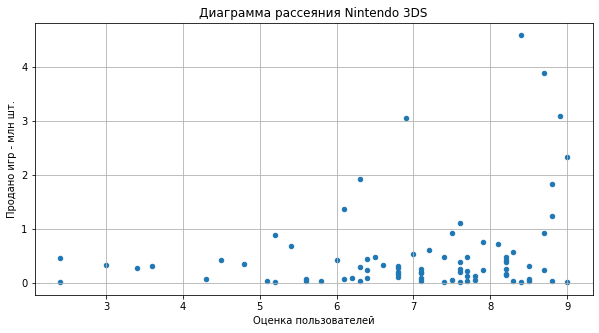

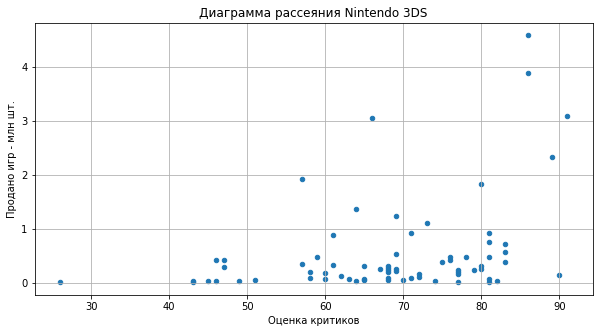

Коэффициент корреляции оценок пользователей к продажам платформы Nintendo 3DS: 0.24150411773563016
Коэффициент корреляции оценок критиков к продажам платформы Nintendo 3DS 0.35705661422881035


In [40]:
(df_new.query('platform == ["3DS"]')
       .plot(x='user_score', y='total_sales', kind='scatter',grid = True, figsize = (10,5)))
plt.title('Диаграмма рассеяния Nintendo 3DS')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продано игр - млн шт.')
ds=df_new.query('platform == ["3DS"]')
plt.show()

(df_new.query('platform == ["3DS"]')
       .plot(x='critic_score', y='total_sales', kind='scatter',grid = True, figsize = (10,5)))
plt.title('Диаграмма рассеяния Nintendo 3DS')
plt.xlabel('Оценка критиков')
plt.ylabel('Продано игр - млн шт.')
plt.show()

print('Коэффициент корреляции оценок пользователей к продажам платформы Nintendo 3DS:', ds['total_sales'].corr(ds['user_score']))
print('Коэффициент корреляции оценок критиков к продажам платформы Nintendo 3DS', ds['total_sales'].corr(ds['critic_score']))

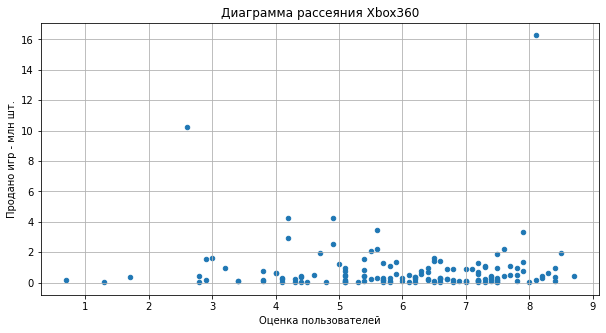

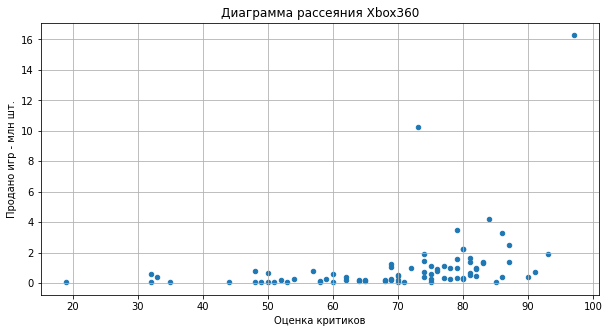

Коэффициент корреляции оценок пользователей к продажам платформы Xbox360: -0.011742185147181342
Коэффициент корреляции оценок критиков к продажам платформы Xbox360 0.3503445460228664


In [41]:
(df_new.query('platform == ["X360"]')
       .plot(x='user_score', y='total_sales', kind='scatter',grid = True, figsize = (10,5)))
plt.title('Диаграмма рассеяния Xbox360')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продано игр - млн шт.')
x_360=df_new.query('platform == ["X360"]')
plt.show()

(df_new.query('platform == ["X360"]')
       .plot(x='critic_score', y='total_sales', kind='scatter',grid = True, figsize = (10,5)))
plt.title('Диаграмма рассеяния Xbox360')
plt.xlabel('Оценка критиков')
plt.ylabel('Продано игр - млн шт.')
plt.show()

print('Коэффициент корреляции оценок пользователей к продажам платформы Xbox360:', x_360['total_sales'].corr(x_360['user_score']))
print('Коэффициент корреляции оценок критиков к продажам платформы Xbox360', x_360['total_sales'].corr(x_360['critic_score']))

**Вывод**


Есть небольшая зависимость продаж от отзывов критиков по всем платформам в отличии от отзывов пользователей.
Чем выше оценка критика, тем больше продано копий игр.
___

### Общее распределение игр по жанрам. 

Рассмотрим общее распределение игр по жанрам и построим график.

,Всего игр.,Продано копий - млн шт.
genre,,
Action,3307,1716.52
Sports,2306,1309.67
Misc,1721,790.29
Role-Playing,1481,931.08
Shooter,1296,1041.36
Adventure,1293,233.33
Racing,1226,723.49
Platform,878,825.55
Simulation,857,387.96


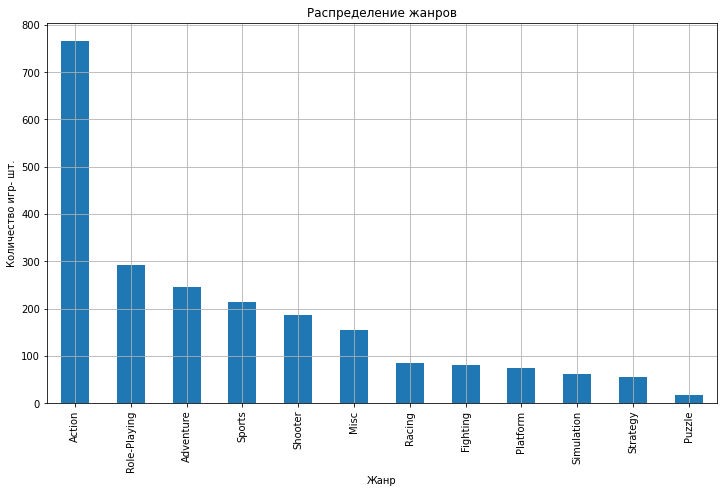

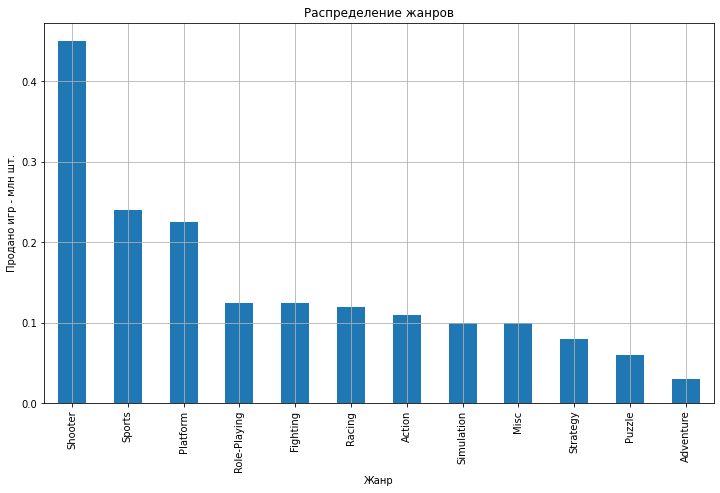

In [42]:
tab1 = df.pivot_table(index='genre', values='total_sales', aggfunc=('count', 'sum')).sort_values(by='count', ascending=False)
tab1.columns=['Всего игр.', 'Продано копий - млн шт.']
display(tab1)

(df_new.groupby('genre').agg({'name': 'count'})
    .sort_values(by='name', ascending=False)
    .plot(kind='bar',legend=False,grid=True, figsize = (12,7)))
plt.title('Распределение жанров')
plt.xlabel('Жанр')
plt.ylabel('Количество игр- шт.')
plt.show()

(df_new.groupby('genre').agg({'total_sales': 'median'})
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar',legend=False,grid=True, figsize = (12,7)))
plt.title('Распределение жанров')
plt.xlabel('Жанр')
plt.ylabel('Продано игр - млн шт.')
plt.show()

**Вывод**


Больше всего игр было произведено в жанре `Action` ~ 35% от общего числа вышедших игр. Но лучше продавались игры в жанре `Shooter`, `Sports` и `Platform`.
___

## Составим портрет пользователя каждого региона.

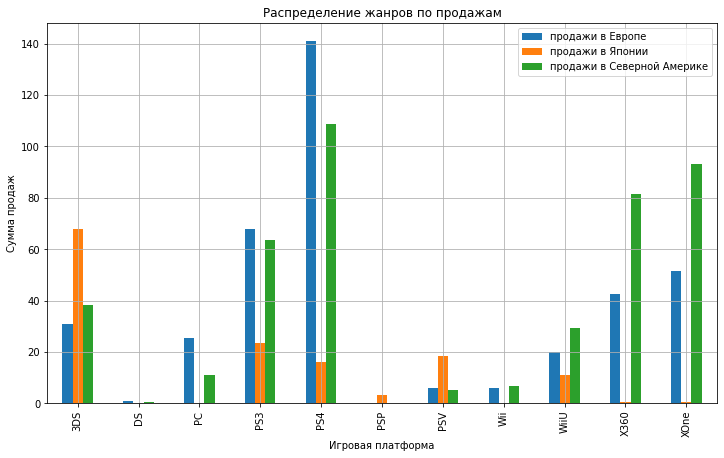

In [43]:
(df_new
    .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .plot(kind='bar',grid=True, figsize = (12,7)))
plt.title('Распределение жанров по продажам')
plt.xlabel('Игровая платформа')
plt.ylabel('Сумма продаж')
plt.legend(['продажи в Европе', 'продажи в Японии', 'продажи в Северной Америке'])
plt.show()

,eu_sales,jp_sales,na_sales
platform,,,
PS4,141.09,15.96,108.74
XOne,51.59,0.34,93.12
X360,42.52,0.51,81.66
PS3,67.81,23.35,63.50
3DS,30.96,67.81,38.20
WiiU,19.85,10.88,29.21
PC,25.36,0.00,11.11
Wii,5.93,0.05,6.56
PSV,6.10,18.59,5.04


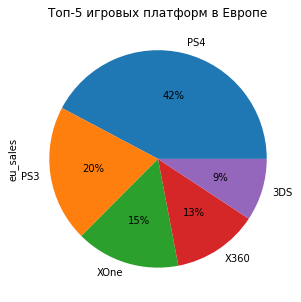

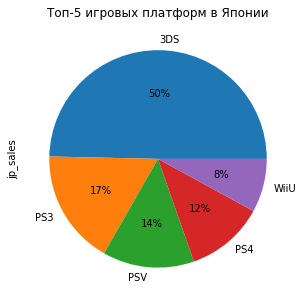

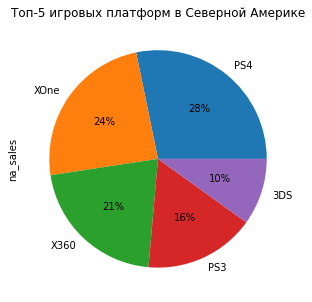

In [44]:
display(df_new.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
      .sort_values(by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False))

eu_platform = (df_new.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                     .sort_values(by='eu_sales', ascending=False)
                     .head(5)
                     .plot(kind='pie', subplots=True, autopct='%1.0f%%', legend=False, figsize = (5,5)))
plt.title('Топ-5 игровых платформ в Европе')

jp_platform = (df_new.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                     .sort_values(by='jp_sales', ascending=False)
                     .head(5)
                     .plot(kind='pie', subplots=True, autopct='%1.0f%%', legend=False, figsize = (5,5)))
plt.title('Топ-5 игровых платформ в Японии')

na_platform = (df_new.pivot_table(index='platform', values='na_sales', aggfunc='sum')
                     .sort_values(by='na_sales', ascending=False)
                     .head(5)
                     .plot(kind='pie', subplots=True, autopct='%1.f%%', legend=False, figsize = (5,5)))
plt.title('Топ-5 игровых платформ в Северной Америке')

plt.show()

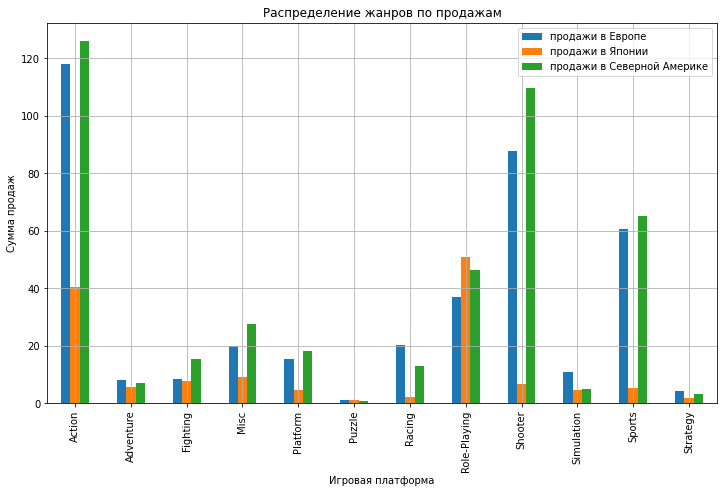

In [45]:
(df_new
    .pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .plot(kind='bar',grid=True, figsize = (12,7)))
plt.title('Распределение жанров по продажам')
plt.xlabel('Игровая платформа')
plt.ylabel('Сумма продаж')
plt.legend(['продажи в Европе', 'продажи в Японии', 'продажи в Северной Америке'])
plt.show()

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Shooter,87.86,6.61,109.74
Sports,60.52,5.41,65.27
Role-Playing,36.97,51.04,46.40
Misc,20.04,9.20,27.49
Platform,15.58,4.79,18.14
Fighting,8.55,7.65,15.55
Racing,20.19,2.30,12.96
Adventure,8.25,5.82,7.14


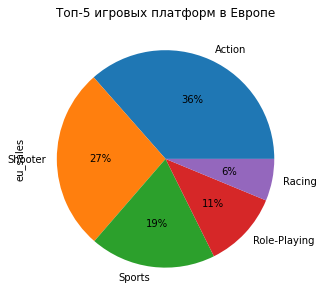

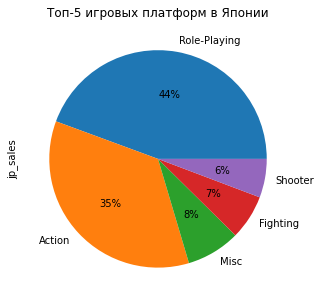

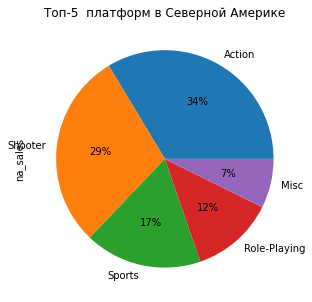

In [46]:
display(df_new.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
      .sort_values(by=['na_sales', 'eu_sales', 'jp_sales'], ascending=False))

eu_genre = (df_new.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                     .sort_values(by='eu_sales', ascending=False)
                     .head(5)
                     .plot(kind='pie', subplots=True, autopct='%1.0f%%', legend=False, figsize = (5,5)))
plt.title('Топ-5 игровых платформ в Европе')

jp_genre = (df_new.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                     .sort_values(by='jp_sales', ascending=False)
                     .head(5)
                     .plot(kind='pie', subplots=True, autopct='%1.0f%%', legend=False, figsize = (5,5)))
plt.title('Топ-5 игровых платформ в Японии')

na_genre = (df_new.pivot_table(index='genre', values='na_sales', aggfunc='sum')
                     .sort_values(by='na_sales', ascending=False)
                     .head(5)
                     .plot(kind='pie', subplots=True, autopct='%1.f%%', legend=False, figsize = (5,5)))
plt.title('Топ-5  платформ в Северной Америке')

plt.show()

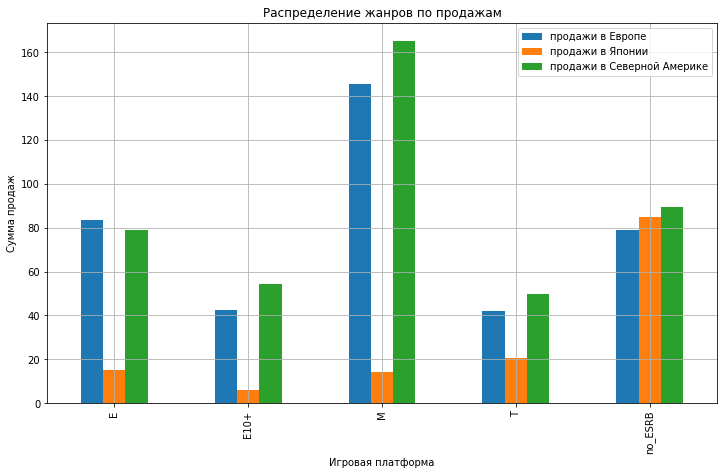

In [47]:
(df_new
    .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .plot(kind='bar',grid=True, figsize = (12,7)))
plt.title('Распределение жанров по продажам')
plt.xlabel('Игровая платформа')
plt.ylabel('Сумма продаж')
plt.legend(['продажи в Европе', 'продажи в Японии', 'продажи в Северной Америке'])
plt.show()

**Вывод** 

**Портрет пользователя из Европы:**

- Популярные платформы -  `PlayStation 4`, `PlayStation 3` и `XboxOne`;
- Популярные игры в жанре: `Action`, `Shooter` и `Sports`;
- Самые популярные игры с рейтингом «M» («Mature») — «Для взрослых» (старше 17 лет).


**Портрет пользователя из Северной Америки:**

- Популярные платформы - `PlayStation 4`, `XboxOne` и `Xbox360`;
- Популярные игры в жанре: `Action`, `Shooter` и `Sports`;
- Самые популярные игры с рейтингом «M» («Mature») — «Для взрослых» (старше 17 лет).

**Портрет пользователя из Японии:**

- Популярные платформы - `Nintendo 3DS`, `PlayStation 3` и `PlayStation Vita`;
- Популярные игры в жанре `Role-Playing` и `Action`;
- Самые популярные игры в рейтинге «T» («Teen») — «Подросткам» (от 13 лет). Рейтинг «RP» («Rating Pending») — «Рейтинг ожидается», поскольку он не определен указывать не будем


Рейтинг «RP» занимает по популярности 1-е место в Японии, 2-е место в Северной Америке и 3-е место в Европе. Ранее мы обозначили пропуски в данных этим значением рейтинга. Данные пропуски могут быть вызваны тем, что рейтинг, назначен другой организацией(например PEGI в Европе и CERO в Японии) с другим обозначением и данные могли выгрузитmся некорректно. Поэтому будем рассматривать реальный рейтинг ESRB.
___

## Проверим гипотезы.
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Необходимо сравнить две генеральные совокупности между собой, для этого сформулируем нулевую(H₀) и альтернативную гипотезы(На):

- H₀ - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- На - Средние пользовательские рейтинги платформ Xbox One и PC разные.

Зададим выборку, рассчитаем выборочное среднее по платформам и дисперсию.

In [48]:
x_one = df_new.query('platform == ["XOne"] and user_score > 0') # Зададим выборку
pc = df_new.query('platform == ["PC"] and user_score > 0')

In [49]:
print('Выборочное среднее по платформе Xbox One равно:', round(x_one['user_score'].mean(), 2))
print('Выборочное среднее по PC равно:', round(pc['user_score'].mean(), 2))
print('----------------------------------------------------')
print('Дисперсия выборки по платформе Xbox One равна:', round(np.var(x_one['user_score'], ddof = 1), 2))
print('Дисперсия выборки по PC равна:', round(np.var(pc['user_score'], ddof = 1), 2))

Выборочное среднее по платформе Xbox One равно: 6.52
Выборочное среднее по PC равно: 6.27
----------------------------------------------------
Дисперсия выборки по платформе Xbox One равна: 1.91
Дисперсия выборки по PC равна: 3.04


Для проверки гипотезы применим t-тест т.к.:
- Генеральные совокупности не зависят друг от друга;
- Выборочные средние должны быть нормально распределены;
- в значении `equal_var` укажу `False`, т.к. дисперсии выборок не равны.

Буду использовать метод `st.ttest_ind()`

In [50]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    x_one['user_score'],
    pc['user_score'],
    equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод**

По результатам проверке не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковые. С вероятностью 14,7% рейтинг платформ Xbox One и PC будет различаться.
___

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Необходимо сравнить две генеральные совокупности между собой, для этого сформулируем нулевую(H₀) и альтернативную гипотезы(На):

- H₀ - Средние пользовательские рейтинги жанров Action и Sports одинаковые;

- На - Средние пользовательские рейтинги жанров Action и Sports разные.

In [51]:
action = df_new.query('genre == "Action" and user_score > 0')
sports = df_new.query('genre == "Sports" and user_score > 0')

In [52]:
print('Выборочное среднее по пользовательсим рейтингам в жанре Action равно:', round(action['user_score'].mean(), 2))
print('Выборочное среднее по пользовательсим рейтингам в жанре Sports равно:', round(sports['user_score'].mean(), 2))
print('---------------------------------------------------------------')
print('Дисперсия пользовательских рейтингов в жанре Action равна:', round(np.var(action['user_score'], ddof = 1), 2))
print('Дисперсия пользовательских рейтингов в жанре Sports равно:', round(np.var(sports['user_score'], ddof = 1), 2))

Выборочное среднее по пользовательсим рейтингам в жанре Action равно: 6.84
Выборочное среднее по пользовательсим рейтингам в жанре Sports равно: 5.24
---------------------------------------------------------------
Дисперсия пользовательских рейтингов в жанре Action равна: 1.77
Дисперсия пользовательских рейтингов в жанре Sports равно: 3.18


Для проверки гипотезы применим t-тест т.к.:
- Генеральные совокупности не зависят друг от друга;
- Выборочные средние должны быть нормально распределены;
- В значении `equal_var` укажу `False`, т.к. дисперсии выборок не равны.

Буду использовать метод `st.ttest_ind()`

In [53]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
    equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод**

По результатам проверки опровергли нулевую гипотезу о равенстве средних значений пользовательских рейтингов жанров Action и Sports в пользу альтернативной гипотезы.

___

## Общий вывод

В ходе работы изучили файл `/datasets/games.csv`, в котором выявили: пропуски, дубликаты и исправили неверные типы данных. Так же при дальнейшей предобработке добавили таблицу столбец `df['total_sales']` c суммарными данными продаж во всех регионах.

В ходе проведения исследовательского анализа выявили следующее закономерности определяющие успешность игры: 

- Средняя продолжительность актуальности консоли меньше 10 лет, пиковые продажи приходятся со 2 по 4 год после релиза, потом постепенно идут на спад;
- Потенциально актуальными платформами будут `PlayStation 4` и `XboxOne`;
- Продажи в небольшой степени, но всё же зависят от оценок критиков, чем выше оценка, тем больше копий игры покупают;
- Лучше продаются игры в жанре `Shooter`, `Sports` и `Platform`
- *В Северной Америке и Европе рейтинг ESRB оказывает влияние на продажу игр. В Японии наоборот, большинство игр не получают рейтинг(или получают, но по другой системе), что не влияет на итоги продаж.*

Так же проверила 2 гипотезы и следующие  оказались верны:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.
___

## Рекомендации

При планировании рекламной компании на следующий год следует обратить внимание на следующие пункты:
- Наиболее коммерчески выгодными кажутся рынки Северной Америки и Европы;
- Востребованные платформы: PlayStation 4 и XboxOne;
- Перспективные жанры игр: shooter, action и role-playing c рейтингом 17+;
- Оценки критиков сильнее влияет на продажи, чем оценки пользователей. Но эта корреляция незначительная, не рекомендовала бы делать на этот пункт основной упор.

____